In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [2]:
dataset = pd.read_csv('./adult.csv', header = None, index_col = False
                     ,names=['age','workclass','fnlwgt','education','education.num','marital.status','occupation',
                             'relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income'
])
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [3]:
dataset = dataset[['age','workclass','education','race','sex',
                   'occupation','hours.per.week', 'income']]
dataset = dataset.dropna()
display(dataset.head())
print(dataset.sex.value_counts())

,age,workclass,education,race,sex,occupation,hours.per.week,income
1,82,Private,HS-grad,White,Female,Exec-managerial,18,<=50K
3,54,Private,7th-8th,White,Female,Machine-op-inspct,40,<=50K
4,41,Private,Some-college,White,Female,Prof-specialty,40,<=50K
5,34,Private,HS-grad,White,Female,Other-service,45,<=50K
6,38,Private,10th,White,Male,Adm-clerical,40,<=50K


Male      20788
Female     9930
Name: sex, dtype: int64


In [4]:
data_dummies = pd.get_dummies(dataset)
print("get_dummies  후의 특성: \n",list(data_dummies.columns),"\n")

get_dummies  후의 특성: 
 ['age', 'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_Female', 'sex_Male', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective

In [5]:
dataset.workclass = dataset.workclass.replace('Private',1)
dataset.workclass = dataset.workclass.replace('Self-emp-inc',2)
dataset.workclass = dataset.workclass.replace('Self-emp-not-inc',3)
dataset.workclass = dataset.workclass.replace('State-gov',4)
dataset.workclass = dataset.workclass.replace('Local-gov',4)
dataset.workclass = dataset.workclass.replace('Federal-gov',4)
dataset.workclass = dataset.workclass.replace('Without-pay',0)

dataset.education = dataset.education.replace('HS-grad',10)
dataset.education = dataset.education.replace('10th',5)
dataset.education = dataset.education.replace('11th',5)
dataset.education = dataset.education.replace('12th',5)
dataset.education = dataset.education.replace('1st-4th',5)
dataset.education = dataset.education.replace('5th-6th',5)
dataset.education = dataset.education.replace('7th-8th',5)
dataset.education = dataset.education.replace('9th',5)
dataset.education = dataset.education.replace('Assoc-acdm',6)
dataset.education = dataset.education.replace('Assoc-voc',6)
dataset.education = dataset.education.replace('Bachelors',7)
dataset.education = dataset.education.replace('Doctorate',8)
dataset.education = dataset.education.replace('Masters',9)
dataset.education = dataset.education.replace('Preschool',11)
dataset.education = dataset.education.replace('Prof-school',12)
dataset.education = dataset.education.replace('Some-college',13)

dataset.race = dataset.race.replace('Amer-Indian-Eskimo',14)
dataset.race = dataset.race.replace('Asian-Pac-Islander',14)
dataset.race = dataset.race.replace('Black',15)
dataset.race = dataset.race.replace('Other',16)
dataset.race = dataset.race.replace('White',17)

dataset.sex = dataset.sex.replace('Female',18)
dataset.sex = dataset.sex.replace('Male',19)

dataset.occupation = dataset.occupation.replace('Adm-clerical',20)
dataset.occupation = dataset.occupation.replace('Armed-Forces',21)
dataset.occupation = dataset.occupation.replace('Craft-repair',22)
dataset.occupation = dataset.occupation.replace('Exec-managerial',23)
dataset.occupation = dataset.occupation.replace('Farming-fishing',24)
dataset.occupation = dataset.occupation.replace('Handlers-cleaners',25)
dataset.occupation = dataset.occupation.replace('Machine-op-inspct',26)
dataset.occupation = dataset.occupation.replace('Other-service',27)
dataset.occupation = dataset.occupation.replace('Priv-house-serv',28)
dataset.occupation = dataset.occupation.replace('Prof-specialty',29)
dataset.occupation = dataset.occupation.replace('Protective-serv',30)
dataset.occupation = dataset.occupation.replace('Sales',31)
dataset.occupation = dataset.occupation.replace('Tech-support',32)
dataset.occupation = dataset.occupation.replace('Transport-moving',33)

dataset.income = dataset.income.replace('<=50K',99)
dataset.income = dataset.income.replace('>50K',100)



In [6]:
X = np.array(pd.DataFrame(dataset, 
                          columns=['age','workclass','education','race','sex',
                   'occupation','hours.per.week']))
y = np.array(pd.DataFrame(dataset, columns=['income']))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
X_train

array([[47,  1,  5, ..., 19, 25, 40],
       [40,  1, 13, ..., 19, 25, 48],
       [46,  1, 13, ..., 19, 22, 38],
       ...,
       [28,  3,  9, ..., 19, 29, 40],
       [25,  1, 13, ..., 19, 22, 40],
       [24,  1,  7, ..., 18, 20, 45]], dtype=int64)

In [8]:
X_test

array([[48,  4, 13, ..., 19, 23, 40],
       [26,  1,  7, ..., 19, 29, 40],
       [38,  4,  8, ..., 18, 29, 40],
       ...,
       [26,  1,  9, ..., 19, 29, 20],
       [39,  1,  6, ..., 19, 23, 40],
       [37,  2, 13, ..., 19, 33, 55]], dtype=int64)

In [9]:
y_train

array([[ 99],
       [ 99],
       [100],
       ...,
       [ 99],
       [ 99],
       [ 99]], dtype=int64)

In [10]:
y_test

array([[ 99],
       [ 99],
       [100],
       ...,
       [ 99],
       [ 99],
       [100]], dtype=int64)

In [30]:
dt_clf = DecisionTreeClassifier(max_depth = 5,random_state = 0)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [31]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
feature_names = dataset.columns.tolist()
feature_names = feature_names[0:7]
target_name = np.array(['loser', 'winner'])
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

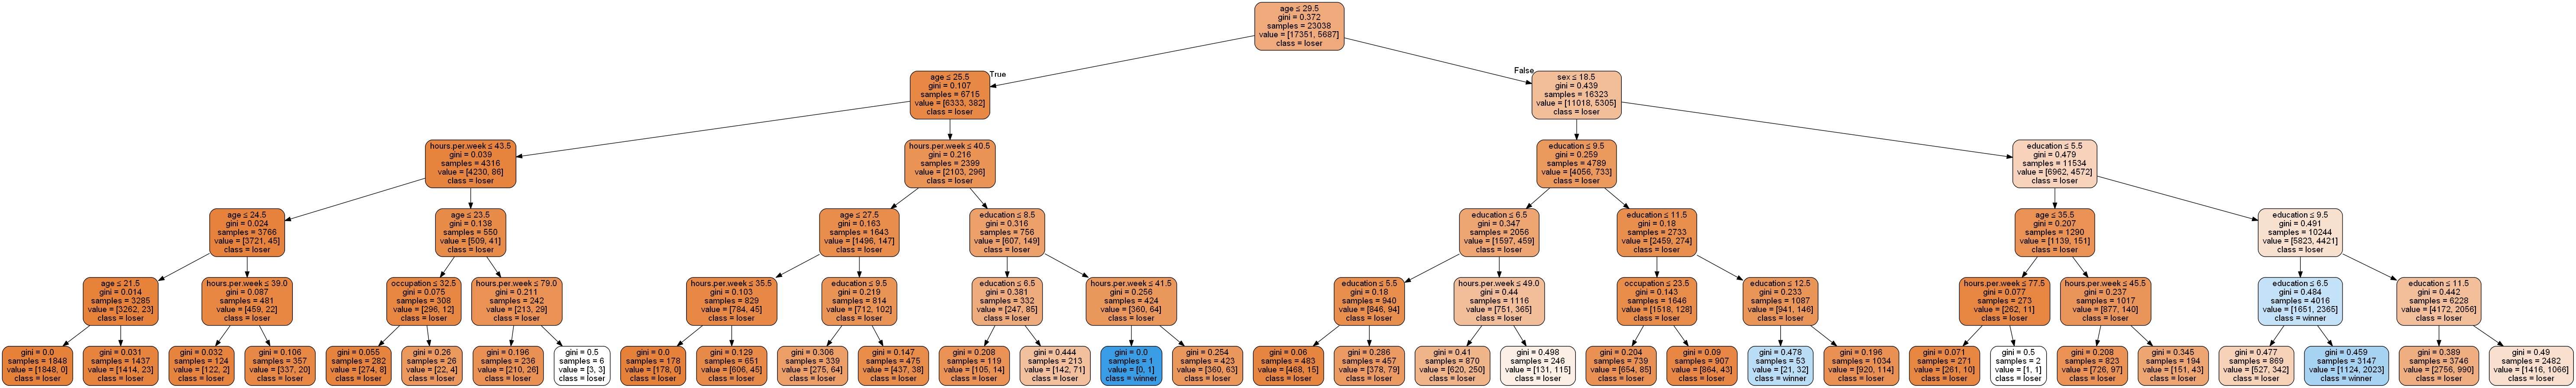

In [32]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [33]:
print('Accuracy: %.2f' % accuracy_score(y_test, dt_prediction))

Accuracy: 0.78
